In [48]:
from astropy.io import fits
import pandas as pd
import numpy as np
from astropy.table import Table
from bliss.catalog import convert_nmgy_to_mag
import torch
import matplotlib.pyplot as plt

In [3]:
from case_studies.galaxy_clustering.data_generation.cluster_prior import ClusterPrior
from case_studies.galaxy_clustering.data_generation.background_prior import BackgroundPrior

cluster_prior = ClusterPrior(image_size=1280)
background_prior = BackgroundPrior(image_size=1280)

In [95]:
cluster = cluster_prior.sample_cluster()
background = background_prior.sample_background()
background_fluxes = torch.tensor(np.array(background[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
cluster_fluxees = torch.tensor(np.array(cluster[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
background_mags = convert_nmgy_to_mag(background_fluxes / 1000)
cluster_mags = convert_nmgy_to_mag(cluster_fluxees / 1000)
background_g_r = background_mags[:,0] / background_mags[:,1]
background_r_i = background_mags[:,1] / background_mags[:,2]
background_i_z = background_mags[:,2] / background_mags[:,3]

cluster_g_r = cluster_mags[:,0] / cluster_mags[:,1]
cluster_r_i = cluster_mags[:,1] / cluster_mags[:,2]
cluster_i_z = cluster_mags[:,2] / cluster_mags[:,3]

In [96]:
for i in range(20):
    cluster = cluster_prior.sample_cluster()
    background = background_prior.sample_background()
    background_fluxes = torch.tensor(np.array(background[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
    cluster_fluxees = torch.tensor(np.array(cluster[["FLUX_G", "FLUX_R", "FLUX_I", "FLUX_Z"]]))
    background_mags = convert_nmgy_to_mag(background_fluxes / 1000)
    cluster_mags = convert_nmgy_to_mag(cluster_fluxees / 1000)
    new_background_g_r = background_mags[:,0] / background_mags[:,1]
    new_background_r_i = background_mags[:,1] / background_mags[:,2]
    new_background_i_z = background_mags[:,2] / background_mags[:,3]

    new_cluster_g_r = cluster_mags[:,0] / cluster_mags[:,1]
    new_cluster_r_i = cluster_mags[:,1] / cluster_mags[:,2]
    new_cluster_i_z = cluster_mags[:,2] / cluster_mags[:,3]

    background_g_r = torch.cat((background_g_r, new_background_g_r))
    background_r_i = torch.cat((background_r_i, new_background_r_i))
    background_i_z = torch.cat((background_i_z, new_background_i_z))

    cluster_g_r = torch.cat((cluster_g_r, new_cluster_g_r))
    cluster_r_i = torch.cat((cluster_r_i, new_cluster_r_i))
    cluster_i_z = torch.cat((cluster_i_z, new_cluster_i_z))

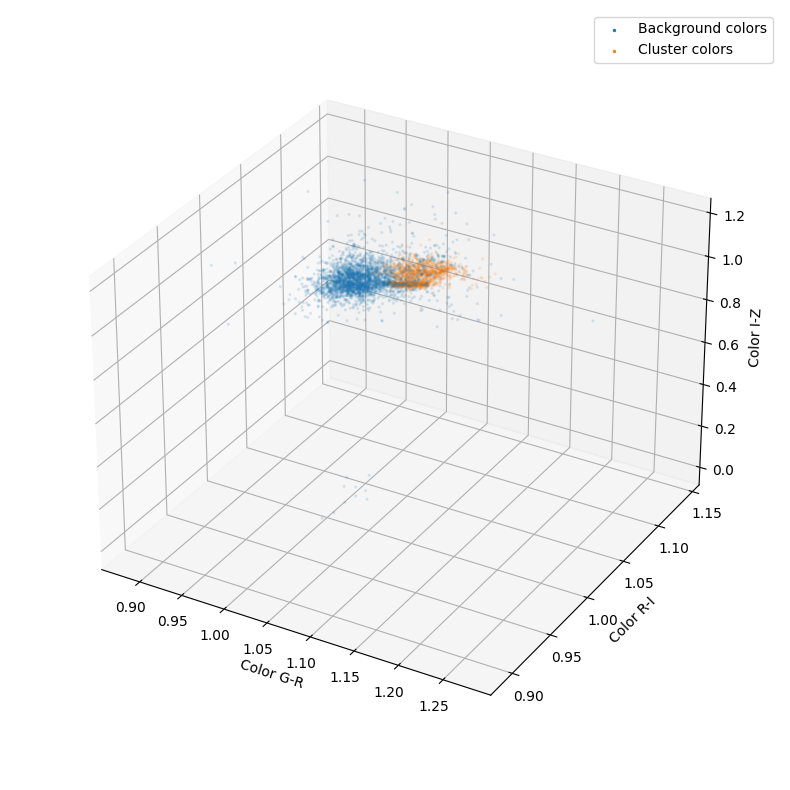

In [99]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.9)
ax.scatter(background_g_r, background_r_i, background_i_z, label='Background colors', alpha=0.1, s=2)
ax.scatter(cluster_g_r, cluster_r_i, cluster_i_z, label='Cluster colors', alpha=0.1, s=2)
ax.set_xlabel("Color G-R")
ax.set_ylabel("Color R-I")
ax.set_zlabel("Color I-Z")
leg = ax.legend()
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()